# TensorFlow Models

## Imports

In [1]:
import datetime
import os
import random

import IPython
import IPython.display
import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

import auxiliaries as aux

In [2]:
tf.__version__

'2.16.2'

## Setup

In [3]:
# Develop Testing and Applied Window
species = 'Deer'
file_name = 'GSM02927'

years_to_predict = 1
time_intervals = 3 if species == 'Moose' else 4

tf_tut_window = aux.WindowGenerator(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name=f'{species}/{file_name}')

reg_window = aux.RegressiveWindow(f'{species}/{file_name}')
classification_window = aux.ClassificationWindow(f'{species}/{file_name}', 3)
rnn_window = aux.RNNWindow(f'{species}/{file_name}')

results = {}

print(f'{species}:')
print('------Tensorflow Tutorial Window------')
print(f'Original Data Size: {len(tf_tut_window.orig_df)}')
print(f'Training Data Size: {len(tf_tut_window.train_df)}')
print(f'Validation Data Size: {len(tf_tut_window.val_df)}')
print(f'Testing Data Size: {len(tf_tut_window.test_df)}')

print()

print('------Regressive Window------')
print(f'Original Data Size: {len(reg_window.orig_df)}')
print(f'Training Data Size: {len(reg_window.train_df)}')
print(f'Testing Data Size: {len(reg_window.test_df)}')

print()

print('------Classification Window------')
print(f'Original Data Size: {len(classification_window.orig_df)}')
print(f'Training Data Size: {len(classification_window.train_df)}')
print(f'Testing Data Size: {len(classification_window.test_df)}')

print()

print('------RNN Regressive Window------')
print(f'Original Data Size: {len(rnn_window.orig_df)}')
print(f'Training Data Size: {len(rnn_window.train_df)}')
print(f'Testing Data Size: {len(rnn_window.test_df)}')

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - loss: 0.6697 - mean_absolute_error: 0.6681 - mean_squared_error: 0.6697 - val_loss: 0.8058 - val_mean_absolute_error: 0.7203 - val_mean_squared_error: 0.8058
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.4630 - mean_absolute_error: 0.5491 - mean_squared_error: 0.4630 - val_loss: 0.5904 - val_mean_absolute_error: 0.6110 - val_mean_squared_error: 0.5904
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.4520 - mean_absolute_error: 0.5448 - mean_squared_error: 0.4520 - val_loss: 0.6528 - val_mean_absolute_error: 0.6432 - val_mean_squared_error: 0.6528
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.4391 - mean_absolute_error: 0.5368 - mean_squared_error: 0.4391 - val_loss: 0.6159 - val_mean_absolute_error: 0.6236 - val_mean_squared_error: 0.6159
Deer:
------Tensorflow Tutorial Window------
Original Data Size: 2923
Training Data Size: 2046
Validation Data Size: 584
Testing Data Size: 293

------Reg

In [4]:
print('------Tensorflow Tutorial Window------')
print(f'Training Mean:\n{tf_tut_window.train_mean}')
print(f'Training St. Dev.:\n{tf_tut_window.train_std}')

print()

print('------Regressive Window------')
print(f'Training Mean:\n{reg_window.train_df.mean()}')
print(f'Training Std. Dev.:\n{reg_window.train_df.std()}')

print()

print('------Classification Window------')
print(f'Training Mean:\n{classification_window.train_df.mean()}')
print(f'Training Std. Dev.:\n{classification_window.train_df.std()}')

print()

print('------Regressive RNN Window------')
print(f'Training Mean:\n{rnn_window.train_df.mean()}')
print(f'Training Std. Dev.:\n{rnn_window.train_df.std()}')

------Tensorflow Tutorial Window------
Training Mean:
longitude      11.031551
latitude       46.008411
altitude     1408.284307
dtype: float64
Training St. Dev.:
longitude      0.021036
latitude       0.002235
altitude     313.338906
dtype: float64

------Regressive Window------
Training Mean:
external-temperature      14.564027
longitude                 11.028824
latitude                  46.008533
altitude                1366.015716
month                      6.307429
day                       15.535191
dtype: float64
Training Std. Dev.:
external-temperature      6.073113
longitude                 0.021822
latitude                  0.002122
altitude                329.474715
month                     3.886132
day                       8.728364
dtype: float64

------Classification Window------
Training Mean:
external-temperature      14.502090
longitude                 11.028910
latitude                  46.008529
altitude                1367.250155
month                      6.28240

## Question 1 Models: Predict Future Position with Past Position
----

### Autoregressive (AR) Model

In [5]:
# Initialize Model
autoregressive_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=3)
history = aux.compile_and_fit(autoregressive_model, tf_tut_window)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - loss: 0.9147 - mean_absolute_error: 0.8072 - mean_squared_error: 0.9147 - val_loss: 0.6138 - val_mean_absolute_error: 0.4673 - val_mean_squared_error: 0.6138
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.5991 - mean_absolute_error: 0.5244 - mean_squared_error: 0.5991 - val_loss: 0.6148 - val_mean_absolute_error: 0.4717 - val_mean_squared_error: 0.6148
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.5724 - mean_absolute_error: 0.5062 - mean_squared_error: 0.5724 - val_loss: 0.6006 - val_mean_absolute_error: 0.4864 - val_mean_squared_error: 0.6006
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.5864 - mean_absolute_error: 0.5104 - mean_squared_error: 0.5864 - val_loss: 0.5960 - val_mean_absolute_error: 0.4893 - val_mean_squared_error: 0.5960
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.5853 - mean_absolute_error: 0.5233 - mean_squared_error: 0.5853 - val_loss: 0.6013 - val_mean

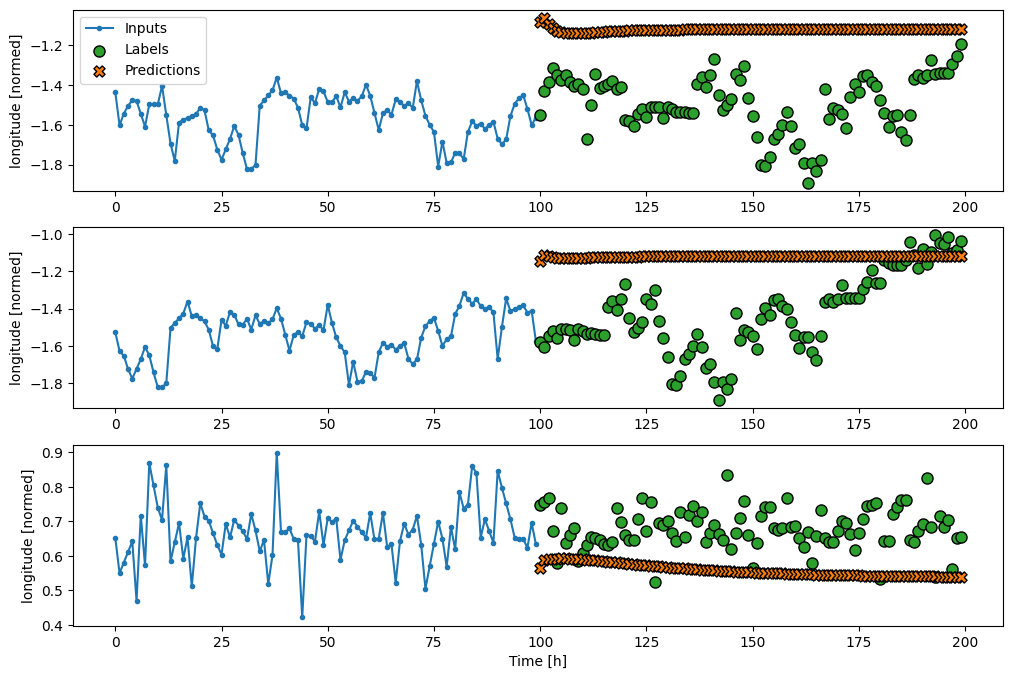

In [6]:
# Plot out how the model conforms to longitude training data
tf_tut_window.plot(autoregressive_model, plot_col='longitude')

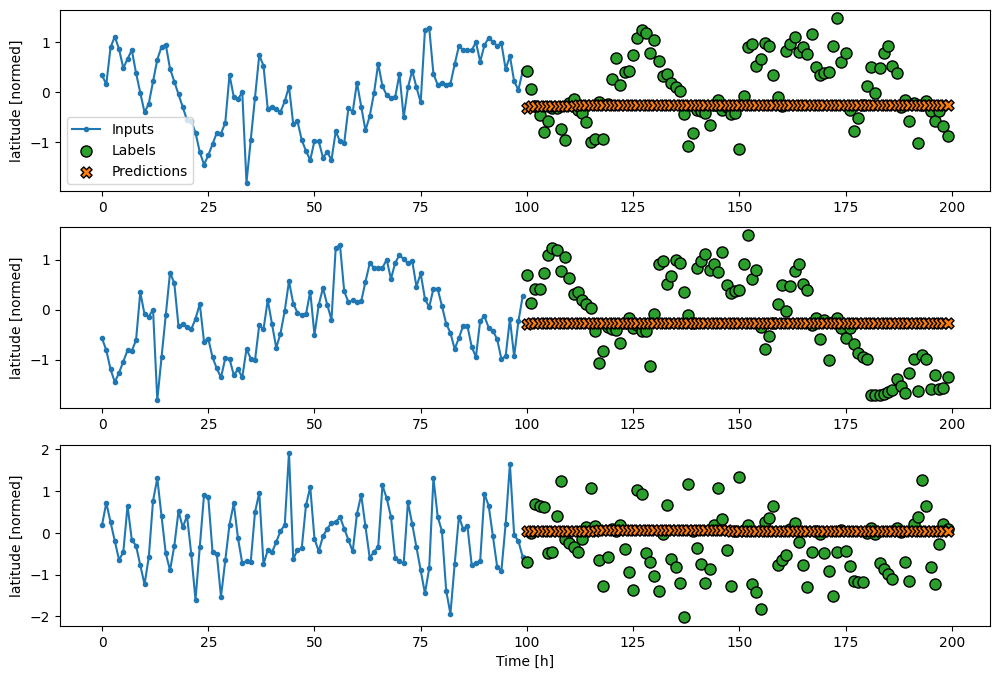

In [7]:
# Plot out how the model conforms to latitude training data
tf_tut_window.plot(autoregressive_model, plot_col='latitude')

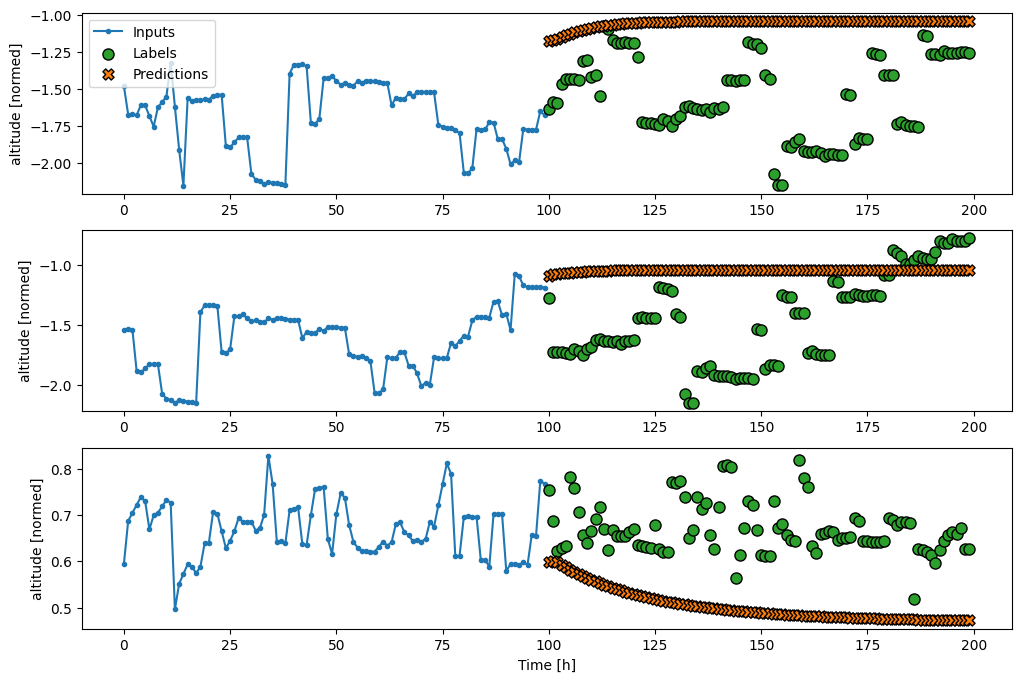

In [8]:
# Plot out how the model conforms to altitude training data
tf_tut_window.plot(autoregressive_model, plot_col='altitude')

In [9]:
results['Autoregressive'] = autoregressive_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4003 - mean_absolute_error: 0.5405 - mean_squared_error: 0.4003


In [10]:
autoregressive_model.save(f'ModelFiles/SavedModels/{species}/{file_name}_autoregressive.keras')
# Generate CSV file for future positions
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_autoregressive', species=species, model=autoregressive_model, number_of_out_steps=(years_to_predict*8760)//(aux.OUT_STEPS*time_intervals))

In [11]:
# Generate CSV file analyzing testing set results
def graph_tf_tutorial(model, window, url_dest):
    # Prepare input and label data
    input_data, label_data = next(iter(window.edge_data))

    # Prepare DataFrames
    predicted_df = pd.DataFrame(model(input_data)[0].numpy(), columns=window.edge_df.columns)*window.train_std + window.train_mean
    input_df = pd.DataFrame(input_data[0].numpy(), columns=window.edge_df.columns)*window.train_std + window.train_mean
    label_df = pd.DataFrame(label_data[0].numpy(), columns=window.edge_df.columns)*window.train_std + window.train_mean

    input_df['timestamp'] = window.date_time.iloc[-(2*aux.OUT_STEPS):-aux.OUT_STEPS].reset_index(drop=True)
    label_df['timestamp'] = window.date_time.iloc[-aux.OUT_STEPS:].reset_index(drop=True)
    predicted_df['timestamp'] = window.date_time.iloc[-aux.OUT_STEPS:].reset_index(drop=True)

    input_df['id'] = ['Inputted Past Positions' for _ in range(len(input_df))]
    label_df['id'] = ['Original Future Positions' for _ in range(len(label_df))]
    predicted_df['id'] = ['Predicted Future Positions' for _ in range(len(predicted_df))]

    # Combine DataFrames
    full_df = pd.concat([input_df, label_df, predicted_df], ignore_index=True)
    full_df.to_csv(url_dest, index=False)

    return full_df

# Load is here to account for autoregressive model changing with each input
autoregressive_model = tf.keras.models.load_model(f'ModelFiles/SavedModels/{species}/{file_name}_autoregressive.keras', custom_objects={'FeedBack':aux.FeedBack})

graph_tf_tutorial(autoregressive_model, tf_tut_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_autoregressive_EdgeAnalysis.csv')

longitude   latitude     altitude           timestamp  \
0    11.000050  46.007557   935.077120 2008-02-10 16:03:10   
1    10.999269  46.008753   933.640004 2008-02-10 20:03:09   
2    10.997081  46.007863   931.869999 2008-02-11 00:01:24   
3    10.998369  46.007551   919.469991 2008-02-11 04:01:52   
4    10.999782  46.008798   916.259995 2008-02-11 08:03:03   
..         ...        ...          ...                 ...   
295  11.008010  46.007826  1082.366809 2008-03-14 16:00:54   
296  11.008010  46.007826  1082.366921 2008-03-14 20:01:53   
297  11.008010  46.007826  1082.366959 2008-03-15 00:03:05   
298  11.008010  46.007826  1082.366959 2008-03-15 04:02:21   
299  11.008010  46.007826  1082.366959 2008-03-15 08:01:37   

                             id  
0       Inputted Past Positions  
1       Inputted Past Positions  
2       Inputted Past Positions  
3       Inputted Past Positions  
4       Inputted Past Positions  
..                          ...  
295  Predicted Future Positions  
296  Predicted Future Positions  
297  Predicted Future Positions  
298  Predicted Future Positions  
299  Predicted Future Positions  

[300 rows x 5 columns]

## RNN Single Shot Model

In [12]:
# Initialize Model
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(aux.OUT_STEPS*len(tf_tut_window.column_indices),
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([aux.OUT_STEPS, len(tf_tut_window.column_indices)])
])
history = aux.compile_and_fit(multi_lstm_model, tf_tut_window)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.9089 - mean_absolute_error: 0.8265 - mean_squared_error: 0.9089 - val_loss: 0.6125 - val_mean_absolute_error: 0.4944 - val_mean_squared_error: 0.6125
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.6060 - mean_absolute_error: 0.5327 - mean_squared_error: 0.6060 - val_loss: 0.6260 - val_mean_absolute_error: 0.4631 - val_mean_squared_error: 0.6260
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.5786 - mean_absolute_error: 0.5093 - mean_squared_error: 0.5786 - val_loss: 0.6223 - val_mean_absolute_error: 0.4563 - val_mean_squared_error: 0.6223


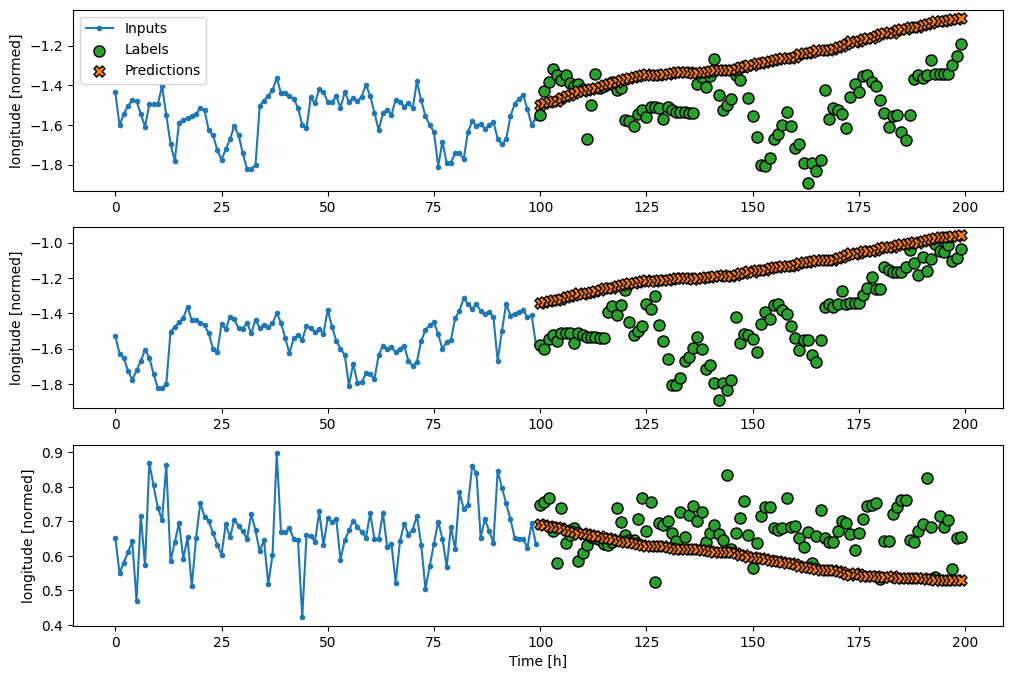

In [13]:
# Plot out how the model conforms to longitude training data
tf_tut_window.plot(multi_lstm_model, plot_col='longitude')

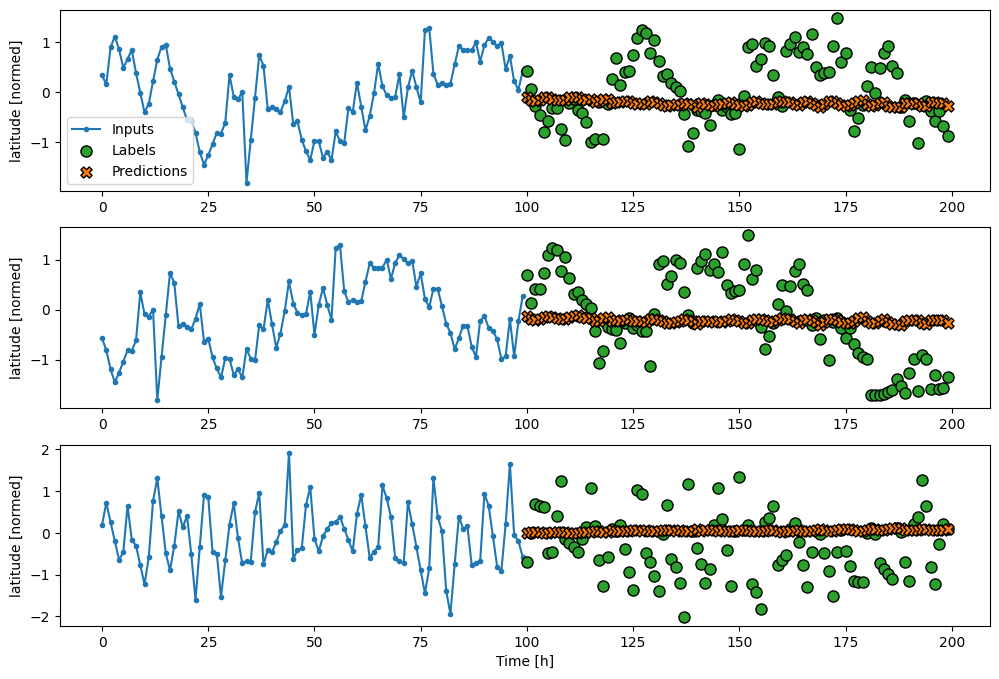

In [14]:
# Plot out how the model conforms to latitude training data
tf_tut_window.plot(multi_lstm_model, plot_col='latitude')

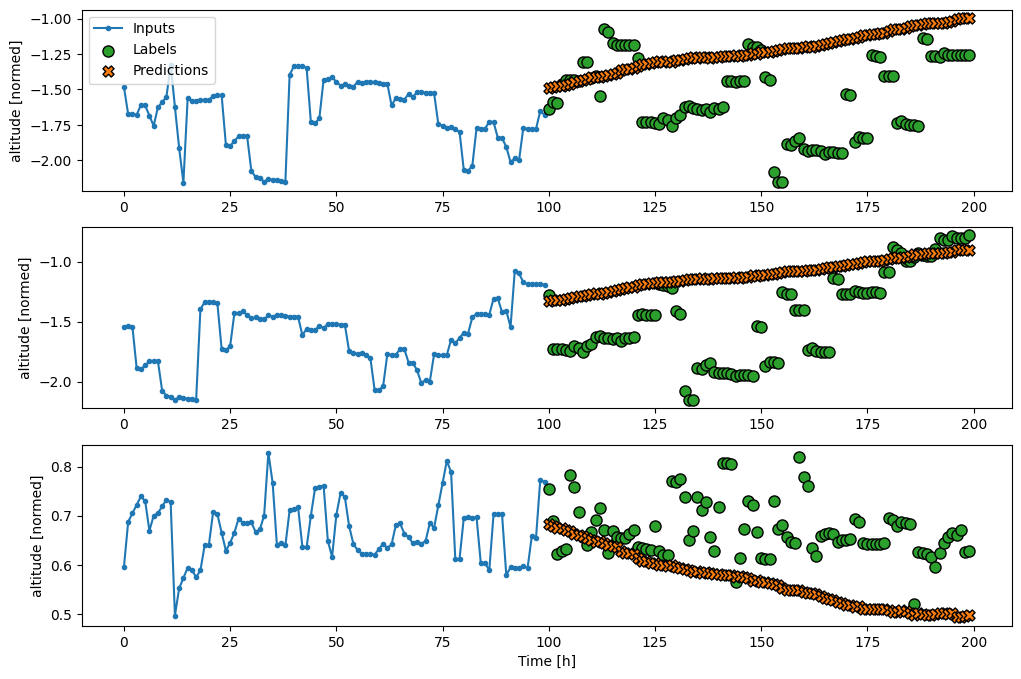

In [15]:
# Plot out how the model conforms to altitude training data
tf_tut_window.plot(multi_lstm_model, plot_col='altitude')

In [16]:
results['Single Shot'] = multi_lstm_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3133 - mean_absolute_error: 0.4377 - mean_squared_error: 0.3133 


In [17]:
multi_lstm_model.save(f'ModelFiles/SavedModels/{species}/{file_name}_singleshot.keras')
# Generate CSV file for future positions
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_singleshot', species=species, model=multi_lstm_model, number_of_out_steps=(years_to_predict*8760)//(aux.OUT_STEPS*time_intervals))

In [18]:
# Generate CSV file analyzing testing set results
graph_tf_tutorial(multi_lstm_model, tf_tut_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_singleshot_EdgeAnalysis.csv')

longitude   latitude     altitude           timestamp  \
0    11.000050  46.007557   935.077120 2008-02-10 16:03:10   
1    10.999269  46.008753   933.640004 2008-02-10 20:03:09   
2    10.997081  46.007863   931.869999 2008-02-11 00:01:24   
3    10.998369  46.007551   919.469991 2008-02-11 04:01:52   
4    10.999782  46.008798   916.259995 2008-02-11 08:03:03   
..         ...        ...          ...                 ...   
295  11.009053  46.007983  1090.384835 2008-03-14 16:00:54   
296  11.009126  46.007958  1096.296624 2008-03-14 20:01:53   
297  11.009223  46.007932  1097.588493 2008-03-15 00:03:05   
298  11.009265  46.007930  1096.402202 2008-03-15 04:02:21   
299  11.009327  46.007794  1096.552641 2008-03-15 08:01:37   

                             id  
0       Inputted Past Positions  
1       Inputted Past Positions  
2       Inputted Past Positions  
3       Inputted Past Positions  
4       Inputted Past Positions  
..                          ...  
295  Predicted Future Positions  
296  Predicted Future Positions  
297  Predicted Future Positions  
298  Predicted Future Positions  
299  Predicted Future Positions  

[300 rows x 5 columns]

## Question 2 Models: Predict Current Position with Current Environmental Conditions
----

### Regressive Model

In [19]:
# Initialize model
regressive_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1,3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])
reg_window.model_compilation_and_fitting(regressive_model)

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.7408 - mean_absolute_error: 0.7034 - mean_squared_error: 0.7408
Epoch 2/20
17/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5260 - mean_absolute_error: 0.5234 - mean_squared_error: 0.5260

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_squared_error
  current = self.get_monitor_value(logs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5394 - mean_absolute_error: 0.5398 - mean_squared_error: 0.5394
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4880 - mean_absolute_error: 0.5083 - mean_squared_error: 0.4880
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4569 - mean_absolute_error: 0.4917 - mean_squared_error: 0.4569
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4442 - mean_absolute_error: 0.4769 - mean_squared_error: 0.4442
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4459 - mean_absolute_error: 0.4730 - mean_squared_error: 0.4459
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4193 - mean_absolute_error: 0.4635 - mean_squared_error: 0.4193
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3974 - mean_absolute_error: 0.4405 - mean_squared_error: 0.3974
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3890 - mean_absolute_error: 0.4318 - mean_squared_error: 0.3890
Epoch 10/20
64/64 ━

In [20]:
results['Regressive Model'] = regressive_model.evaluate(reg_window.test_input, reg_window.test_label, verbose=1, return_dict=True)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3816 - mean_absolute_error: 0.4071 - mean_squared_error: 0.3816


In [21]:
# Generate CSV file for future positions
reg_window.csv_extension(f'{species}/{file_name}_regressive', species, regressive_model, out_steps=(years_to_predict*8760)//time_intervals)

In [22]:
regressive_model.save(f'ModelFiles/SavedModels/{species}/{file_name}_regressive.keras')

In [23]:
# Generate CSV file analyzing testing set results
def graph_regressive(model, window, url_dest):
    test_df = window.test_df
    test_df['timestamp'] = window.timeline

    initial_df = test_df[['timestamp', 'month', 'day', 'external-temperature', 'longitude', 'latitude', 'altitude']]
    initial_df['id'] = ['original' for _ in range(len(initial_df))]

    data = {
        'timestamp': [],
        'month': [],
        'day': [],
        'external-temperature': [],
        'longitude': [],
        'latitude': [],
        'altitude': [],
        'id': []
    }

    for i in range(len(initial_df)):
        section = initial_df.iloc[i]

        timestamp = section['timestamp']
        month = section['month']
        day = section['day']
        external_temp = section['external-temperature']

        if isinstance(model, tf.keras.Sequential):
            output_fields = model(np.array([external_temp, month, day]).reshape([1, 1, 3]))*window.train_df[['longitude', 'latitude', 'altitude']].std() + window.train_df[['longitude', 'latitude', 'altitude']].mean()
            output_fields = output_fields.numpy()[0][0]
        elif isinstance(model, sklearn.neighbors.KNeighborsRegressor):
            output_fields = model.predict([[external_temp, month, day]])[0]*window.train_df[['longitude', 'latitude', 'altitude']].std() + window.train_df[['longitude', 'latitude', 'altitude']].mean()
            output_fields = output_fields.values

        longitude = output_fields[0]
        latitude = output_fields[1]
        altitude = output_fields[2]
        id = 'predicted'

        data['timestamp'].append(timestamp)
        data['month'].append(month)
        data['day'].append(day)
        data['external-temperature'].append(external_temp)
        data['longitude'].append(longitude)
        data['latitude'].append(latitude)
        data['altitude'].append(altitude)
        data['id'].append(id)

    add_on_df = pd.DataFrame(data)
    
    full_df = pd.concat([initial_df, add_on_df], ignore_index=True)
    full_df.to_csv(url_dest, index=False)

    return full_df

graph_regressive(regressive_model, reg_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_regressive_EdgeAnalysis.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\3972214981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = ['original' for _ in range(len(initial_df))]


timestamp  month  day  external-temperature  longitude  \
0    2006-11-12 12:03:04     11   12                  11.0  11.048721   
1    2006-11-13 00:02:24     11   13                   6.0  11.048721   
2    2006-11-13 16:01:48     11   13                   9.0  11.020601   
3    2006-11-14 12:03:04     11   14                  16.0  11.048545   
4    2006-11-16 00:00:44     11   16                  10.0  11.041611   
...                  ...    ...  ...                   ...        ...   
1749 2008-03-12 08:02:23      3   12                  10.0  10.841846   
1750 2008-03-13 08:02:42      3   13                  10.0  10.832049   
1751 2008-03-13 16:01:43      3   13                  20.0  10.880290   
1752 2008-03-14 12:02:21      3   14                  19.0  10.868550   
1753 2008-03-15 00:03:05      3   15                  12.0  10.828006   

       latitude     altitude         id  
0     46.011148  1607.810000   original  
1     46.011148  1607.810000   original  
2     46.007475  1660.120000   original  
3     46.007201  1614.450000   original  
4     46.010942  1625.810000   original  
...         ...          ...        ...  
1749  46.007626 -1687.137085  predicted  
1750  46.007889 -1840.905151  predicted  
1751  45.997253  -638.708252  predicted  
1752  45.998383  -840.839722  predicted  
1753  46.005932 -1856.823608  predicted  

[1754 rows x 8 columns]

### RNN Regressive Model

In [24]:
rnn_regressive_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(aux.OUT_STEPS*3,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([aux.OUT_STEPS, 3])
])

rnn_window.model_compilation_and_fitting(rnn_regressive_model)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 1.0053 - mean_absolute_error: 0.8852 - mean_squared_error: 1.0053
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.0019 - mean_absolute_error: 0.8837 - mean_squared_error: 1.0019
Epoch 3/20


c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_squared_error
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.9984 - mean_absolute_error: 0.8821 - mean_squared_error: 0.9984
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.9946 - mean_absolute_error: 0.8804 - mean_squared_error: 0.9946
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.9906 - mean_absolute_error: 0.8786 - mean_squared_error: 0.9906
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.9864 - mean_absolute_error: 0.8767 - mean_squared_error: 0.9864
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.9819 - mean_absolute_error: 0.8747 - mean_squared_error: 0.9819
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.9772 - mean_absolute_error: 0.8725 - mean_squared_error: 0.9772
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.9721 - mean_absolute_error: 0.8701 - mean_squared_error: 0.9721
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.9667 - mean_absolute_error: 0.8675 - mean_squared_error: 0.9667
Epoch 11/20
1/1 ━━

In [25]:
results['RNN Regressive Model'] = rnn_regressive_model.evaluate(rnn_window.test_input, rnn_window.test_label, verbose=1, return_dict=True)
rnn_window.csv_extension(f'{species}/{file_name}_RNN_regressive', species, rnn_regressive_model)
rnn_regressive_model.save(f'ModelFiles/SavedModels/{species}/{file_name}_RNN_regressive.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step - loss: 0.9846 - mean_absolute_error: 0.8785 - mean_squared_error: 0.9846


In [26]:
def graph_rnn_regressive(model, window, url_dest):
    # Isolate OUTSTEP
    initial_df = window.test_df
    initial_df['timestamp'] = window.timeline[int(len(window.orig_df)*0.7):]

    # Gather Data
    input_data = window.test_input
    predicted_data = model(input_data).numpy().reshape((input_data.shape[0]*input_data.shape[1], input_data.shape[2]))
    
    # Concatenation
    input_df = initial_df[['timestamp', 'external-temperature', 'month', 'day']].reset_index()
    label_df = pd.DataFrame(predicted_data, columns=['longitude', 'latitude', 'altitude'])*window.train_df[['longitude', 'latitude', 'altitude']].std() + window.train_df[['longitude', 'latitude', 'altitude']].mean()
    add_on_df = pd.concat([input_df, label_df], axis=1).drop(columns='index')

    initial_df['id'] = 'original'
    add_on_df['id'] = 'predicted'

    final_df = pd.concat([initial_df[:input_data.shape[0]*input_data.shape[1]], add_on_df[:input_data.shape[0]*input_data.shape[1]]], axis=0, ignore_index=True)[['timestamp', 'external-temperature', 'month', 'day', 'longitude', 'latitude', 'altitude', 'id']]
    final_df.to_csv(url_dest, index=False)

    return final_df


graph_rnn_regressive(rnn_regressive_model, rnn_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_RNN_regressive_EdgeAnalysis.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\215980653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['timestamp'] = window.timeline[int(len(window.orig_df)*0.7):]
C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\215980653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = 'original'


timestamp  external-temperature  month  day  longitude  \
0    2007-10-19 16:02:55                  11.0     10   19  11.047242   
1    2007-10-19 20:01:47                  12.0     10   19  11.048442   
2    2007-10-20 00:01:11                   7.0     10   20  11.047115   
3    2007-10-20 04:00:55                   9.0     10   20  11.048017   
4    2007-10-20 08:00:55                   9.0     10   20  11.046749   
...                  ...                   ...    ...  ...        ...   
1595 2008-03-01 08:02:13                  16.0      3    1  11.028947   
1596 2008-03-01 12:02:21                  25.0      3    1  11.028967   
1597 2008-03-01 16:03:08                  19.0      3    1  11.029034   
1598 2008-03-01 20:02:55                  14.0      3    1  11.028880   
1599 2008-03-02 00:00:55                  15.0      3    2  11.028959   

       latitude     altitude         id  
0     46.010533  1600.140000   original  
1     46.008974  1599.290000   original  
2     46.009779  1608.800000   original  
3     46.008876  1590.410000   original  
4     46.009134  1630.740000   original  
...         ...          ...        ...  
1595  46.008191  1371.235008  predicted  
1596  46.008186  1370.837204  predicted  
1597  46.008213  1370.687066  predicted  
1598  46.008134  1370.864953  predicted  
1599  46.008209  1370.739953  predicted  

[1600 rows x 8 columns]

In [27]:
rnn_regressive_model(rnn_window.test_input).numpy().shape

(8, 100, 3)

In [28]:
rnn_window.test_input.shape

(8, 100, 3)

In [29]:
graph_regressive(rnn_regressive_model, rnn_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_RNN_regressive_EdgeAnalysis.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\3972214981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['timestamp'] = window.timeline


timestamp  month  day  external-temperature  longitude  \
0    2007-10-19 16:02:55     10   19                  11.0  11.047242   
1    2007-10-19 20:01:47     10   19                  12.0  11.048442   
2    2007-10-20 00:01:11     10   20                   7.0  11.047115   
3    2007-10-20 04:00:55     10   20                   9.0  11.048017   
4    2007-10-20 08:00:55     10   20                   9.0  11.046749   
...                  ...    ...  ...                   ...        ...   
1749 2008-03-14 16:00:54      3   14                  20.0  11.032139   
1750 2008-03-14 20:01:53      3   14                  10.0  11.032594   
1751 2008-03-15 00:03:05      3   15                  12.0  11.032516   
1752 2008-03-15 04:02:21      3   15                   9.0  11.032605   
1753 2008-03-15 08:01:37      3   15                  17.0  11.032196   

       latitude     altitude         id  
0     46.010533  1600.140000   original  
1     46.008974  1599.290000   original  
2     46.009779  1608.800000   original  
3     46.008876  1590.410000   original  
4     46.009134  1630.740000   original  
...         ...          ...        ...  
1749  46.008457  1417.617065  predicted  
1750  46.008533  1424.475220  predicted  
1751  46.008518  1423.320435  predicted  
1752  46.008545  1424.650635  predicted  
1753  46.008469  1418.502197  predicted  

[1754 rows x 8 columns]

### K-Neighbors Regressor

In [30]:
# Reshape input and outputs
k_reg_train_input = reg_window.train_input.reshape((reg_window.train_input.shape[0], reg_window.train_input.shape[-1]))
k_reg_train_label = reg_window.train_label.reshape((reg_window.train_label.shape[0], reg_window.train_label.shape[-1]))

k_reg_test_input = reg_window.test_input.reshape((reg_window.test_input.shape[0], reg_window.test_input.shape[-1]))
k_reg_test_label = reg_window.test_label.reshape((reg_window.test_label.shape[0], reg_window.test_label.shape[-1]))

# Training the model and making predictions
k_reg = sklearn.neighbors.KNeighborsRegressor()
k_reg.fit(k_reg_train_input, k_reg_train_label)
k_reg_predictions = k_reg.predict(k_reg_test_input)

# Generating error statistics
k_reg_mae = sklearn.metrics.mean_absolute_error(k_reg_test_label, k_reg_predictions, multioutput='uniform_average')
k_reg_mse = sklearn.metrics.mean_squared_error(k_reg_test_label, k_reg_predictions, multioutput='uniform_average')

results['Regressive Baseline'] = {'loss': k_reg_mse,
                                  'mean_absolute_error': k_reg_mae,
                                  'mean_squared_error': k_reg_mse}
print(results['Regressive Baseline'])

# Generate CSV file for future positions
reg_window.csv_extension(f'{species}/{file_name}_k_means_regressor', species, k_reg, out_steps=(years_to_predict*8760)//time_intervals)

# Generate CSV file for testing set
graph_regressive(k_reg, reg_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_k_means_regressor_EdgeAnalysis.csv')

{'loss': 0.35770646815502816, 'mean_absolute_error': 0.36152113404277336, 'mean_squared_error': 0.35770646815502816}


C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\3972214981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = ['original' for _ in range(len(initial_df))]


timestamp  month  day  external-temperature  longitude  \
0    2006-11-12 12:03:04     11   12                  11.0  11.048721   
1    2006-11-13 00:02:24     11   13                   6.0  11.048721   
2    2006-11-13 16:01:48     11   13                   9.0  11.020601   
3    2006-11-14 12:03:04     11   14                  16.0  11.048545   
4    2006-11-16 00:00:44     11   16                  10.0  11.041611   
...                  ...    ...  ...                   ...        ...   
1749 2008-03-12 08:02:23      3   12                  10.0  11.028262   
1750 2008-03-13 08:02:42      3   13                  10.0  11.028262   
1751 2008-03-13 16:01:43      3   13                  20.0  11.041095   
1752 2008-03-14 12:02:21      3   14                  19.0  11.041095   
1753 2008-03-15 00:03:05      3   15                  12.0  11.028262   

       latitude  altitude         id  
0     46.011148  1607.810   original  
1     46.011148  1607.810   original  
2     46.007475  1660.120   original  
3     46.007201  1614.450   original  
4     46.010942  1625.810   original  
...         ...       ...        ...  
1749  46.006683  1490.730  predicted  
1750  46.006683  1490.730  predicted  
1751  46.006625  1620.704  predicted  
1752  46.006625  1620.704  predicted  
1753  46.006683  1490.730  predicted  

[1754 rows x 8 columns]

## Question 3 Models: Predict Current Region with Current Enviornmental Conditions
----

In [31]:
# Generate CSV file looking at how the regions were clusted/established
def graph_clusters(window, url_dest):
    orig_df = window.orig_df
    orig_df['timestamp'] = window.timeline

    input_val = (orig_df[['longitude', 'latitude', 'altitude']] - orig_df[['longitude', 'latitude', 'altitude']].mean())/orig_df[['longitude', 'latitude', 'altitude']].std()

    orig_df['label'] = window.k_means.predict(input_val.values)

    orig_df = orig_df[['timestamp', 'external-temperature', 'month', 'day', 'longitude', 'latitude', 'altitude', 'label']]

    orig_df.to_csv(url_dest, index=False)
    
    return orig_df

graph_clusters(classification_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_classification_clustering_groups.csv')

timestamp  external-temperature  month  day  longitude  \
0    2006-11-12 12:03:04                  11.0     11   12  11.048721   
1    2006-11-12 16:03:04                   9.0     11   12  11.048721   
2    2006-11-12 20:03:04                   8.0     11   12  11.048721   
3    2006-11-13 00:02:24                   6.0     11   13  11.048721   
4    2006-11-13 04:01:23                   2.0     11   13  11.045284   
...                  ...                   ...    ...  ...        ...   
2918 2008-03-14 16:00:54                  20.0      3   14  11.056188   
2919 2008-03-14 20:01:53                  10.0      3   14  11.054483   
2920 2008-03-15 00:03:05                  12.0      3   15  11.057391   
2921 2008-03-15 04:02:21                   9.0      3   15  11.056060   
2922 2008-03-15 08:01:37                  17.0      3   15  11.056131   

       latitude  altitude  label  
0     46.011148   1607.81      0  
1     46.011148   1607.81      0  
2     46.011148   1607.81      0  
3     46.011148   1607.81      0  
4     46.012401   1603.96      0  
...         ...       ...    ...  
2918  46.008492   1521.79      2  
2919  46.008365   1549.28      2  
2920  46.009090   1549.37      0  
2921  46.007830   1548.38      2  
2922  46.008373   1555.34      2  

[2923 rows x 8 columns]

### Classification Model

In [32]:
# Initialize model
classification_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(classification_window.n_clusters, activation='softmax'),
])
classification_window.model_compilation_and_fitting(classification_model)

Epoch 1/20


c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6678 - loss: 0.8178
Epoch 2/20
23/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7000 - loss: 0.6183

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6994 - loss: 0.6301
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7058 - loss: 0.6078
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7190 - loss: 0.5787
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7523 - loss: 0.5338
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7701 - loss: 0.5021
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7577 - loss: 0.5150
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7788 - loss: 0.5006
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7635 - loss: 0.5157
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7609 - loss: 0.5122
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7784 - loss: 0.4795
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7670 - loss: 0.4982
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7744 - loss: 0.4780

In [33]:
results['Classification Model'] = classification_model.evaluate(classification_window.test_input, classification_window.test_label, verbose=1, return_dict=True)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4730  


In [34]:
# Generate CSV file for future positions
classification_window.csv_extension(f'{species}/{file_name}_classification', species, classification_model, out_steps=(years_to_predict*8760)//time_intervals)

c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:622: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_on_data['longitude'].append(point[0])
c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:623: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_on_data['latitude'].append(point[1])
c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:624: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

In [35]:
classification_model.save(f'ModelFiles/SavedModels/{species}/{file_name}_classification.keras')

In [36]:
def graph_classifcation(model, window, url_dest):
    test_df = window.test_df
    test_df['timestamp'] = window.timeline

    initial_df = test_df[['timestamp', 'month', 'day', 'external-temperature', 'longitude', 'latitude', 'altitude']]
    initial_df['id'] = ['original' for _ in range(len(initial_df))]
    initial_df['label'] = window.k_means.predict(((initial_df[['longitude', 'latitude', 'altitude']] - window.test_df[['longitude', 'latitude', 'altitude']].mean())/window.test_df[['longitude', 'latitude', 'altitude']].std()).values)

    add_on_data = {
        'timestamp': [],
        'month': [],
        'day': [],
        'external-temperature': [],
        'longitude': [],
        'latitude': [],
        'altitude': [],
        'label': [],
        'id': []
    }

    for i in range(len(initial_df)):
        section = initial_df.iloc[i]

        timestamp = section['timestamp']
        month = section['month']
        day = section['day']
        external_temp = section['external-temperature']
        if isinstance(model, tf.keras.Sequential):
            output_field = model(np.array([external_temp, month, day]).reshape((1, 1, 3)))
            label = max(range(window.n_clusters), key = lambda x: output_field[0][0][x])
        elif isinstance(model, aux.ClassificationBaseline):
            output_field = model.predict(np.array([external_temp, month, day]).reshape((1,1,3)))
            label = output_field[0][0][0]

        point = window.clusters[label]*window.train_df[['longitude', 'latitude', 'altitude']].std() + window.train_df[['longitude', 'latitude', 'altitude']].mean()
        
        add_on_data['timestamp'].append(timestamp)
        add_on_data['external-temperature'].append(external_temp)
        add_on_data['month'].append(month)
        add_on_data['day'].append(day)
        
        add_on_data['longitude'].append(point[0])
        add_on_data['latitude'].append(point[1])
        add_on_data['altitude'].append(point[2])
        add_on_data['label'].append(label)
        add_on_data['id'].append('predicted')
    
    add_on_df = pd.DataFrame(add_on_data)

    full_df = pd.concat([initial_df, add_on_df], ignore_index=True)

    full_df.to_csv(url_dest, index=False)

    return full_df

graph_classifcation(classification_model, classification_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_classification_EdgeAnalysis.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\1848170089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = ['original' for _ in range(len(initial_df))]
C:\Users\Imper\AppData\Local\Temp\ipykernel_30464\1848170089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['label'] = window.k_means.predict(((initial_df[['longitude', 'latitude', 'altitude']] - window.test_df[['longitude', 'latitude', 'altitude']].mean())/window.test_df[['longitude', 'latitude', 'altitude']].std()).

timestamp  month  day  external-temperature  longitude  \
0   2006-11-16 12:01:51     11   16                  13.0  11.043815   
1   2006-11-16 16:01:24     11   16                  13.0  11.042891   
2   2006-11-23 16:03:09     11   23                   7.0  11.044101   
3   2006-11-26 12:00:49     11   26                  11.0  11.042715   
4   2006-11-26 20:00:56     11   26                   8.0  11.047760   
..                  ...    ...  ...                   ...        ...   
579 2008-03-09 12:03:04      3    9                  15.0  11.001292   
580 2008-03-10 12:03:10      3   10                  14.0  11.001292   
581 2008-03-11 00:01:26      3   11                  11.0  11.001292   
582 2008-03-11 04:03:08      3   11                  12.0  11.001292   
583 2008-03-11 16:02:10      3   11                  17.0  11.001292   

      latitude     altitude         id  label  
0    46.006443  1622.170000   original      2  
1    46.007972  1612.360000   original      2  
2    46.007673  1693.690133   original      2  
3    46.005301  1705.830000   original      2  
4    46.011002  1606.770000   original      0  
..         ...          ...        ...    ...  
579  46.008167   954.283553  predicted      1  
580  46.008167   954.283553  predicted      1  
581  46.008167   954.283553  predicted      1  
582  46.008167   954.283553  predicted      1  
583  46.008167   954.283553  predicted      1  

[584 rows x 9 columns]

In [37]:
class_baseline = aux.ClassificationBaseline(classification_window.n_clusters)

# Define inputs and outputs
class_test_input = classification_window.test_input
class_test_label = classification_window.test_label.reshape((classification_window.test_label.shape[0], classification_window.test_label.shape[-1]))
class_predictions = class_baseline.predict(class_test_label).reshape((class_test_label.shape[0], class_test_label.shape[-1]))

# Generating metrics
results['Classification Baseline'] = {'accuracy': sklearn.metrics.accuracy_score(class_test_label, class_predictions)}

# Generate CSV file for future positions
classification_window.csv_extension(f'{species}/{file_name}_random_classification', species, class_baseline, out_steps=(years_to_predict*8760)//time_intervals)

# Generate CSV file for testing set
graph_classifcation(class_baseline, classification_window, f'CSVFiles/TestPerformanceCSV/{species}/{file_name}_classification_baseline_EdgeAnalysis.csv')

c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:622: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_on_data['longitude'].append(point[0])
c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:623: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  add_on_data['latitude'].append(point[1])
c:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels 2.0\auxiliaries.py:624: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

timestamp  month  day  external-temperature  longitude  \
0   2006-11-16 12:01:51     11   16                  13.0  11.043815   
1   2006-11-16 16:01:24     11   16                  13.0  11.042891   
2   2006-11-23 16:03:09     11   23                   7.0  11.044101   
3   2006-11-26 12:00:49     11   26                  11.0  11.042715   
4   2006-11-26 20:00:56     11   26                   8.0  11.047760   
..                  ...    ...  ...                   ...        ...   
579 2008-03-09 12:03:04      3    9                  15.0  11.001292   
580 2008-03-10 12:03:10      3   10                  14.0  11.001292   
581 2008-03-11 00:01:26      3   11                  11.0  11.044838   
582 2008-03-11 04:03:08      3   11                  12.0  11.044838   
583 2008-03-11 16:02:10      3   11                  17.0  11.001292   

      latitude     altitude         id  label  
0    46.006443  1622.170000   original      2  
1    46.007972  1612.360000   original      2  
2    46.007673  1693.690133   original      2  
3    46.005301  1705.830000   original      2  
4    46.011002  1606.770000   original      0  
..         ...          ...        ...    ...  
579  46.008167   954.283553  predicted      1  
580  46.008167   954.283553  predicted      1  
581  46.007017  1616.827401  predicted      2  
582  46.007017  1616.827401  predicted      2  
583  46.008167   954.283553  predicted      1  

[584 rows x 9 columns]

## Final Results

In [38]:
results_df = pd.DataFrame(results).T
results_df.to_csv(f'ModelFiles/Statistics/{species}/{file_name}_test_data.csv', index_label='Model_Name')
results_df

loss  mean_absolute_error  mean_squared_error  \
Autoregressive           0.400932             0.540251            0.400932   
Single Shot              0.315822             0.439590            0.315822   
Regressive Model         0.342123             0.373931            0.342123   
RNN Regressive Model     0.984649             0.878531            0.984649   
Regressive Baseline      0.357706             0.361521            0.357706   
Classification Model     0.510998                  NaN                 NaN   
Classification Baseline       NaN                  NaN                 NaN   

                         accuracy  
Autoregressive                NaN  
Single Shot                   NaN  
Regressive Model              NaN  
RNN Regressive Model          NaN  
Regressive Baseline           NaN  
Classification Model     0.756849  
Classification Baseline  0.294521